In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\ASFAR\Desktop\Jupyter\Anomaly Detection\bearings.csv", index_col=0, parse_dates=[0])
df.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


<Axes: >

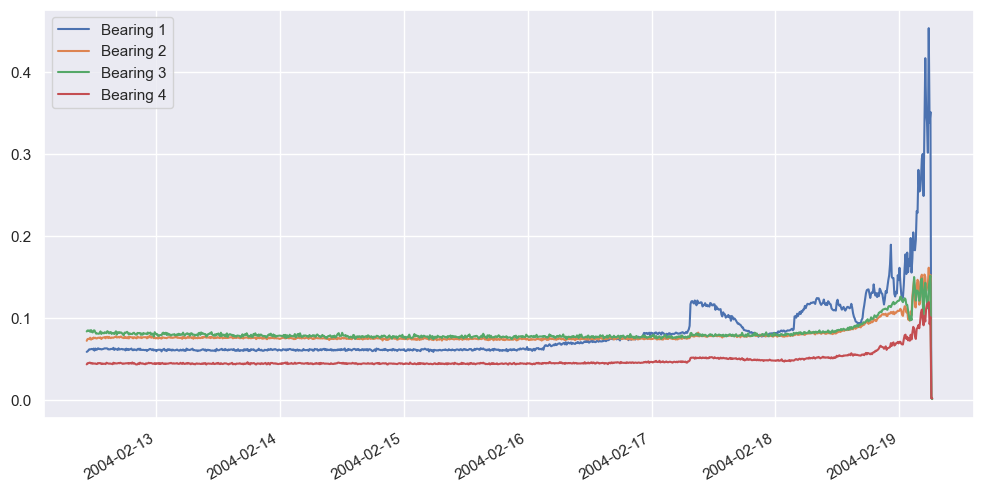

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

df.plot(figsize = (12, 6))

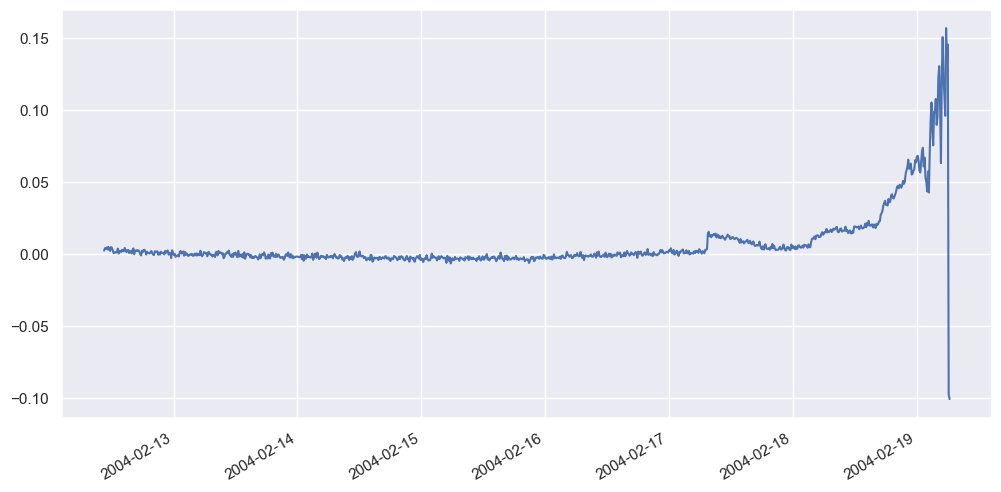

In [7]:
from sklearn.decomposition import PCA

x_train = df['2004-02-12 10:32:39':'2004-02-13 23:42:39']
x_test = df['2004-02-13 23:52:39':]

pca = PCA(n_components=1, random_state=0)
x_train_pca = pd.DataFrame(pca.fit_transform(x_train))
x_train_pca.index = x_train.index

x_test_pca = pd.DataFrame(pca.transform(x_test))
x_test_pca.index = x_test.index

df_pca = pd.concat([x_train_pca, x_test_pca])
df_pca.plot(figsize = (12, 6))
plt.legend().remove()

<Axes: >

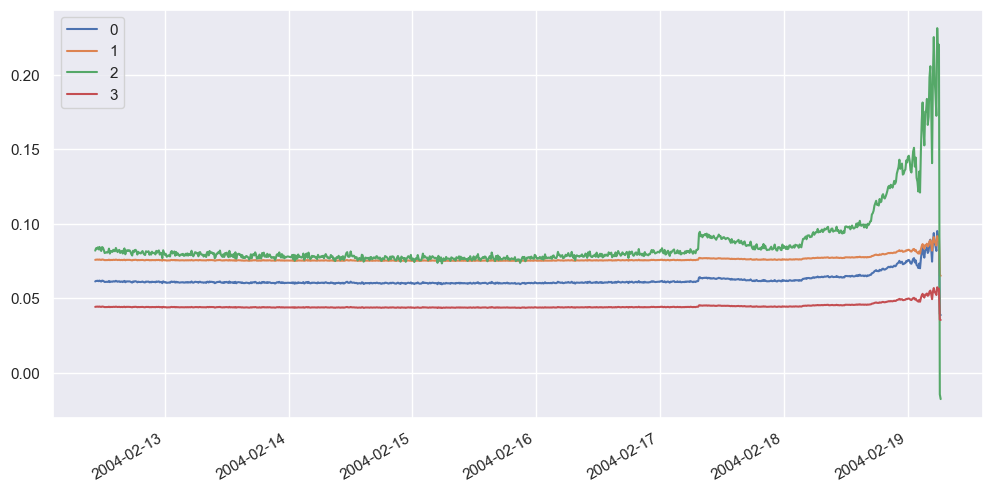

In [8]:
df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index)
df_restored.plot(figsize = (12, 6))

In [9]:
df.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [10]:
df_restored.head()

,0,1,2,3
2004-02-12 10:32:39,0.061336,0.075812,0.082033,0.044257
2004-02-12 10:42:39,0.061697,0.075981,0.083626,0.044397
2004-02-12 10:52:39,0.061652,0.075960,0.083426,0.044380
2004-02-12 11:02:39,0.061826,0.076042,0.084195,0.044447
2004-02-12 11:12:39,0.061519,0.075898,0.082840,0.044328


In [11]:
import numpy as np

def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

<Axes: >

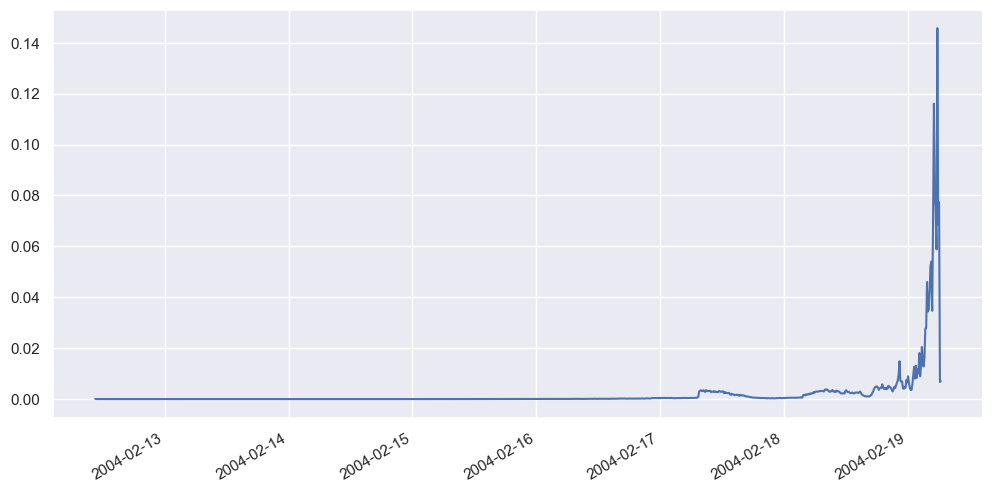

In [12]:
scores = get_anomaly_scores(df, df_restored)
scores.plot(figsize = (12, 6))

In [13]:
def is_anomaly(data, pca, threshold):
    pca_data = pca.transform(data)
    restored_data = pca.inverse_transform(pca_data)
    loss = np.sum((data - restored_data) ** 2)
    return loss > threshold

In [14]:

x = [df.loc['2004-02-16 22:52:39']]
is_anomaly(x, pca, 0.002)


False

In [15]:
x = [df.loc['2004-02-18 22:52:39']]
is_anomaly(x, pca, 0.002)

True

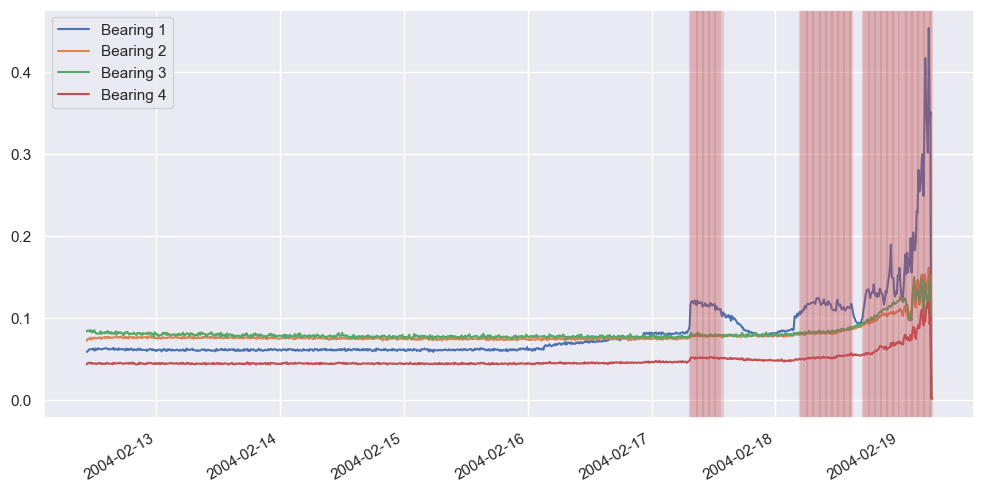

In [16]:
df.plot(figsize = (12, 6))

for index, row in df.iterrows():
    if is_anomaly([row], pca, 0.002):
        plt.axvline(row.name, color='r', alpha=0.2)

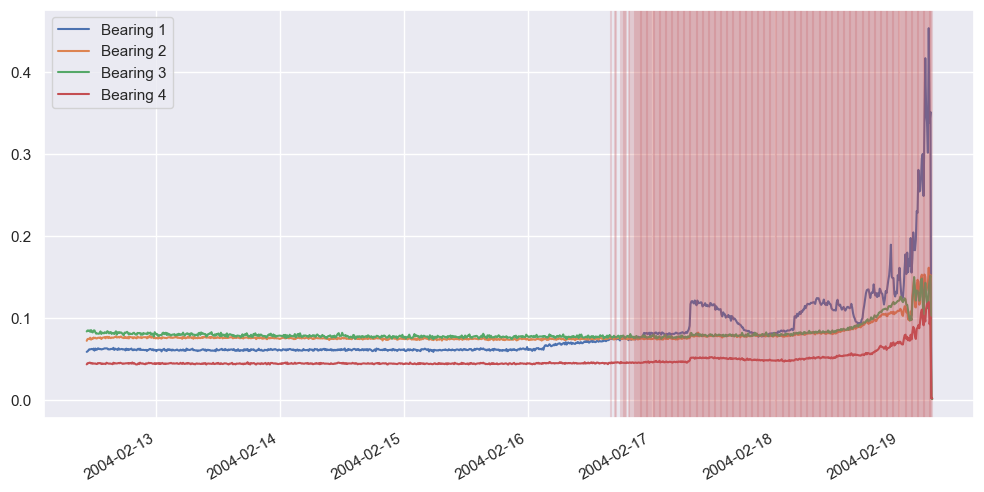

In [17]:
df.plot(figsize = (12, 6))

for index, row in df.iterrows():
    if is_anomaly([row], pca, 0.0002):
        plt.axvline(row.name, color='r', alpha=0.2)